<a href="https://colab.research.google.com/github/sabinajashir/Deep-learning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ROOT = "/content/drive/MyDrive/dlcvnlp"

In [2]:
import os
os.chdir(ROOT)

In [3]:
os.getcwd()

'/content/drive/MyDrive/dlcvnlp'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

plt.style.use("fivethirtyeight")

In [5]:
class perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
  
  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z > 0 , 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
    print(f"X_with_bias : \n{X_with_bias}") 

    for epoch in range(self.epochs):
      print(f"For each epoch : ",epoch)
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value : {y_hat}")
      error = self.y - y_hat
      print(f"Error value : \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"Updated weights : \n{self.weights}")
      print(f"________________________________\n")
  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


In [6]:
#activationFunction = lambda inputs, weights: np.where(np.dot(inputs,weights)>0 ,1 ,0)

AND




In [7]:
Data = {"x1" : [0, 0, 1, 1], "x2": [0, 1, 0, 1 ], "y" :[0, 0, 0, 1]}

AND =pd.DataFrame(Data)
AND


,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  y_hat = np.where(z>=0, 1, 0)
  return y_hat


In [8]:
X = AND.drop("y",axis =1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [9]:
y= AND["y"]
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [10]:
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

or 

y= AND["y"]

y.to_frame()

In [11]:
#model = perceptron(eta = 0.1, epochs =50, activationFunction = activationFunction)
model = perceptron(eta = 0.1, epochs =50)

self.weights: [4.02625040e-05 4.26532804e-05 1.55118742e-05]


In [12]:
model.fit(X,y)

X_with_bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
For each epoch :  0
predicted value : [0 1 1 1]
Error value : 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights : 
[-0.09995974 -0.09995735  0.20001551]
________________________________

For each epoch :  1
predicted value : [0 0 0 0]
Error value : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights : 
[4.02625040e-05 4.26532804e-05 1.00015512e-01]
________________________________

For each epoch :  2
predicted value : [0 0 0 0]
Error value : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights : 
[1.00040263e-01 1.00042653e-01 1.55118742e-05]
________________________________

For each epoch :  3
predicted value : [0 1 1 1]
Error value : 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights : 
[4.02625040e-05 4.26532804e-05 2.00015512e-01]
________________________________

For each epoch :  4
predicted value : [0 0 0 0]
Error value : 
0    0
1    0
2   

In [13]:
model.predict(X)

array([0, 0, 0, 1])

In [14]:
import os

# saving model
dir_ = "model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


OR gate

In [15]:
Data ={"x1":[0,0,1,1],"x2":[0,1,0,1], "y" : [0,1,1,1]}
OR= pd.DataFrame(Data)

In [16]:
X= OR.drop("y",axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [17]:
y= OR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,1


XOR gate

In [18]:
Data ={"x1":[0,0,1,1],"x2":[0,1,0,1], "y" : [0,1,1,0]}
XOR= pd.DataFrame(Data)

In [19]:
X= XOR.drop("y",axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [20]:
y=XOR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,0


Graph Analysis

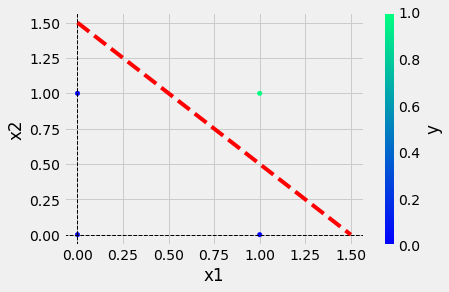

In [21]:
AND.plot(kind="scatter",x="x1",y="x2",c="y",cmap="winter")
plt.axhline(y=0, color ="black",linestyle ="--",linewidth =1)
plt.axvline(x=0, color ="black",linestyle ="--",linewidth =1)

x = np.linspace(0, 1.5)
y = 1.5 -1 * np.linspace(0, 1.5)
plt.plot(x, y, "r--")

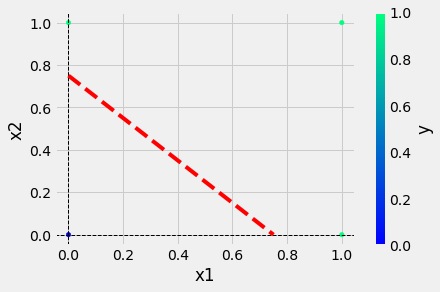

In [22]:
OR.plot(kind="scatter",x="x1",y="x2",c="y",cmap="winter")
plt.axhline(y=0, color ="black",linestyle ="--",linewidth =1)
plt.axvline(x=0, color ="black",linestyle ="--",linewidth =1)

x = np.linspace(0, .75)
y = .75 -1 * np.linspace(0, .75)
plt.plot(x, y, "r--")

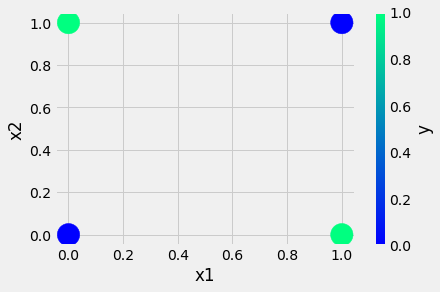

In [23]:
XOR.plot(kind="scatter",x="x1",y="x2",c="y",s=500,cmap="winter")